In [1]:
# 240102 단순 회귀분석 실습(1. 전기생산량과 전기사용량 예측; p.4 )
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from matplotlib import font_manager, rc

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/fonts/malgun.ttf").get_name()
rc("font", family=font_name)

In [2]:
# 회귀분석 : 1.전기생산량과 소비량
# 독립변수(전기생산량), 종속변수(전기소비량) → 독립변수가 1개이므로 단순회귀분석(선형회귀분석) 사용
# 귀무가설 : 전기생산량과 전기소비량 간에 상관관계가 없다.
# 대립가설 : 전기생산량과 전기소비량 간에 상관관계가 있다.

# 월별 전기생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

# 월별 전기 사용량(백만kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# linregress(독립변수,종속변수) → 선형회귀분석
result = stats.linregress(X, y)
result

# 기울기(slope), 절편(intercept), 상관계수(rvalue), pvalue(예측 불확실성의 정도를 나타내는 값.  0.05 미만일 때 통계학적으로 유의미)
# 에러의 표준편차(stderr): 실제값과 예측값의 평균적인 차이
# p_value : 9.238421943157891e-05으로 0.05보다 작다(95% 신뢰수준. 통계적으로 유의미) → 귀무가설을 기각하고 대립가설 채택
# 결론 : 전기생산량과 전기소비량 간에 상관관계가 있다.
# 상관분석 : 두 변수 간에 어떤 선형적 관계가 있는지 분석
# 상관계수(rvalue) : 상관관계의 정도를 파악하는 값. -1에서 1사이 값(1에 가까울수록 좋은 성능)

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728, intercept_stderr=0.3110591892275586)

Text(0, 0.5, '전기사용량')

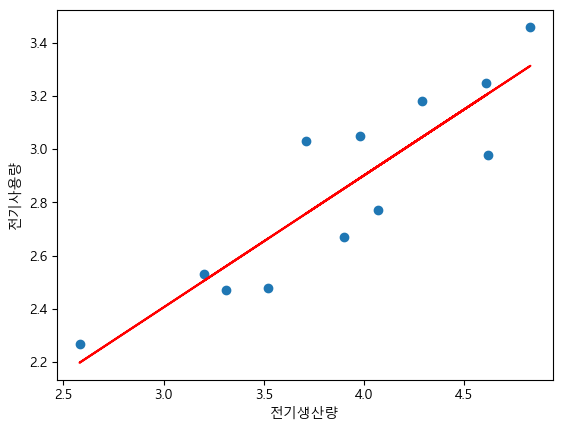

In [4]:
# 기울기(slope), 절편(intercept), 상관계수(rvalue), pvalue(예측 불확실성의 정도를 나타내는 값.  0.05 미만일 때 통계학적으로 유의미)
# 에러의 표준편차(stderr): 실제값과 예측값의 평균적인 차이
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)

# 산점도 그리기
x1 = np.array(X)

# 회귀선 그리기
plt.scatter(X, y)

plt.plot(x1, slope * x1 + intercept, c="red")
plt.xlabel("전기생산량")
plt.ylabel("전기사용량")

In [5]:
# 생산량이 4일 때 전기사용량 예측
4 * slope + intercept

2.901994372142104

<Axes: >

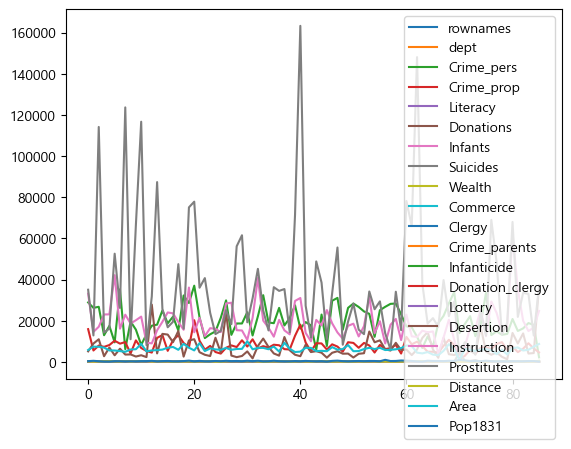

In [7]:
# E. 다중회귀분석 실습(p.15) → Guerry 데이터셋(1830년도 프랑스의 사회인구학적 데이터)
# Literacy: 문해율
# Crime_prop: 재산범죄당 인구
# Wealth: 재산세 순위
# Distance: 수도 파리까지의 거리(km)

import pandas as pd 
df=pd.read_csv('c:/data/guerry/Guerry.csv')
df

df.plot()

In [8]:
#결측값 1개가 제거됨, inplace=True 실행 후 결과값을 현재 변수에 다시 저장
df.dropna(inplace=True)
# drop na: 결측값 제거, inplace=True 값 대체
df.shape

(85, 24)

In [10]:
#변수 4개만 선택
df2=df[['Crime_prop','Literacy','Wealth', 'Distance']]

In [11]:
import statsmodels.formula.api as smf

# Ordinary Least Squares(OLS) 방식: 회귀분석
# 잔차(Residual) : 실제값과 예측값의 차
# 잔차의 제곱의 합을 최소로 하는 방식으로 회귀선을 그리는 방식
model=smf.ols(formula='Crime_prop ~ Literacy+Wealth+Distance', data=df2).fit()
# OLS회귀분석
# formula 수식 → formula='종속(결과) ~ 독립(원인)'
# .fit() → 분석, 학습

model.summary()
# R-squared: 상관계수제곱, coef: 기울기(회귀계수) , P>|t|: 유의확률(<0.05 → 유의미)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Crime_prop   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     10.33
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           7.89e-06
Time:                        10:15:40   Log-Likelihood:                -788.25
No. Observations:                  85   AIC:                             1584.
Df Residuals:                      81   BIC:                             1594.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7118.5554   1162.059      6.126      0.000    4806.423    9430.688
Literacy     -41.6264     17.664     -2.357      0.021     -76.773      -6.480
Wealth        43.4753     12.868      3.378      0.001      17.871      69.080
Distance       2.4385      3.158      0.772      0.442      -3.845       8.722
==============================================================================
Omnibus:                       26.539   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.437
Skew:                           1.238   Prob(JB):                     1.36e-10
Kurtosis:                       5.587   Cond. No.                         954.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Literacy', ylabel='Crime_prop'>

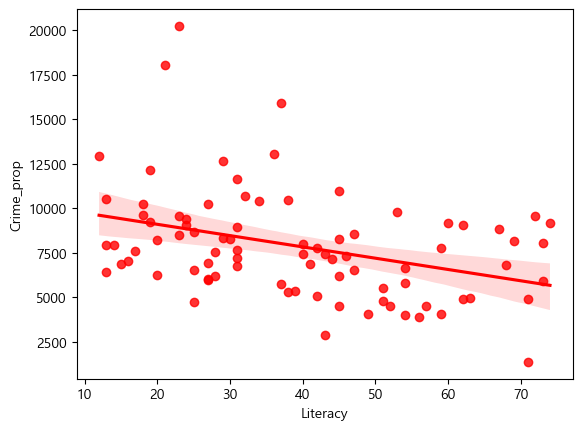

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

#회귀모형그래프
sns.regplot(x='Literacy', y='Crime_prop', data=df, color='red')

<Axes: xlabel='Wealth', ylabel='Crime_prop'>

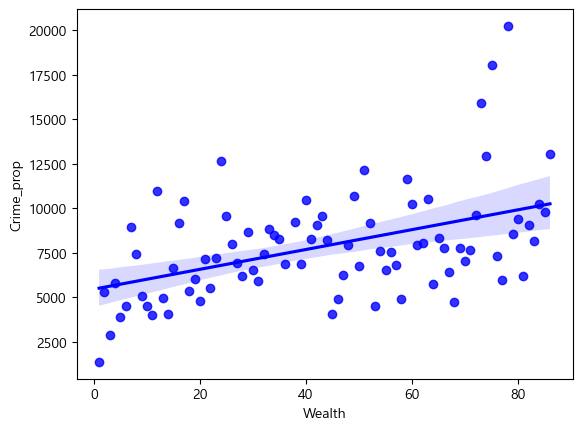

In [13]:
sns.regplot(x='Wealth', y='Crime_prop', data=df, color='blue')

<Axes: xlabel='Distance', ylabel='Crime_prop'>

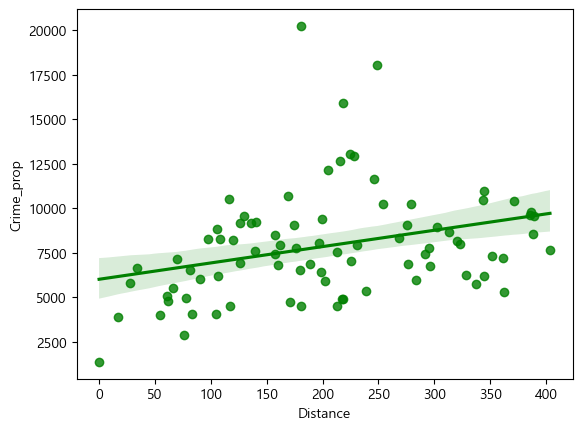

In [14]:
sns.regplot(x='Distance', y='Crime_prop', data=df, color='green')

<Axes: xlabel='Distance', ylabel='Crime_prop'>

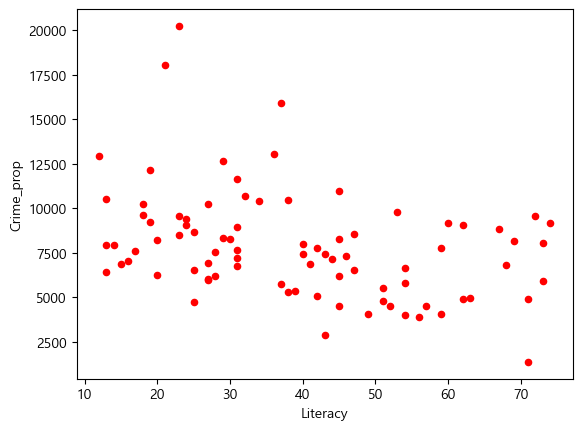

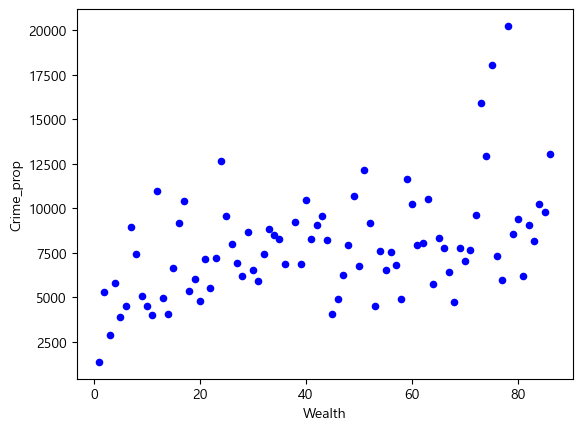

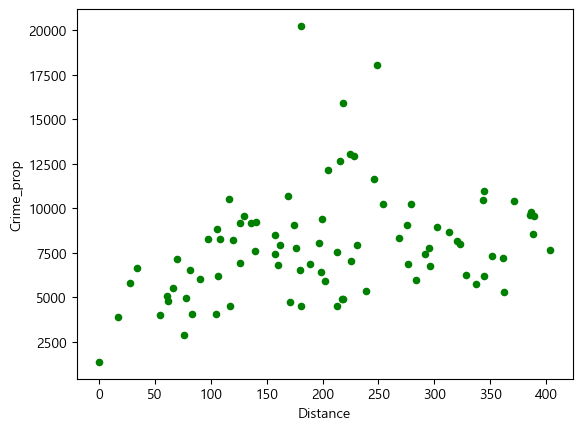

In [15]:
#산점도
df.plot('Literacy', 'Crime_prop', kind='scatter',color='red')
df.plot('Wealth', 'Crime_prop', kind='scatter', color='blue')
df.plot('Distance','Crime_prop',kind='scatter',color='green')

In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
X=df[['Literacy','Wealth','Distance']]
y=df['Crime_prop']
model.fit(X,y)

LinearRegression()

In [18]:
#문해율 80, 재산세 순위 1, 수도까지의 거리 20일 때의 범죄율
literacy=80
wealth=1
distance=20

regionA=[literacy, wealth, distance]
crimeA=model.predict([regionA])
crimeA
#3880명당 1건의 범죄(예측)

c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3880.68993851])

In [19]:
#문해율 10, 재산세 순위 70, 수도까지의 거리 500일 때의 범죄율
literacy =10
wealth=70
distance=500

regionB=[literacy, wealth, distance]
crimeB=model.predict([regionB])
crimeB
#10964명당 1건의 범죄(예측)

c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10964.81313077])

In [20]:
#문해율 50, 재산세 순위 30, 수도까지의 거리 300일 때의 범죄율(A,B 중간 정도의 동네)
literacy=50
wealth=30
distance=300

regionC=[literacy, wealth, distance]
crimeC=model.predict([regionC])
crimeC
#7073명당 1건의 범죄(예측)

c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7073.04508028])

In [4]:
# 240103 회귀분석 실습: p.48 (6) 주택 가격 예측2
# https://www.kaggle.com/anthonypino/price-analysis-and-linear-regression

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot

df = pd.read_csv("c:/data/house_regress/data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
df.shape

(19740, 21)

In [6]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [8]:
# loc[행범위, 열범위] → 필드명 기반
# iloc[행범위, 열범위] → 인덱스, 숫자기반

# start : stop : step
# 0 : 10 : 2 → 시작부터 10까지, 2씩
#  : 10 → 10까지
# 1 : → 1부터 끝까지
# : → all

X = df.loc[
    :,
    [
        "Rooms",
        "Distance",
        "Bedroom2",
        "Bathroom",
        "Car",
        "Landsize",
        "BuildingArea",
        "Propertycount",
    ],
]
y = df["Price"]
df2 = pd.concat([X, y], axis=1)

<Axes: >

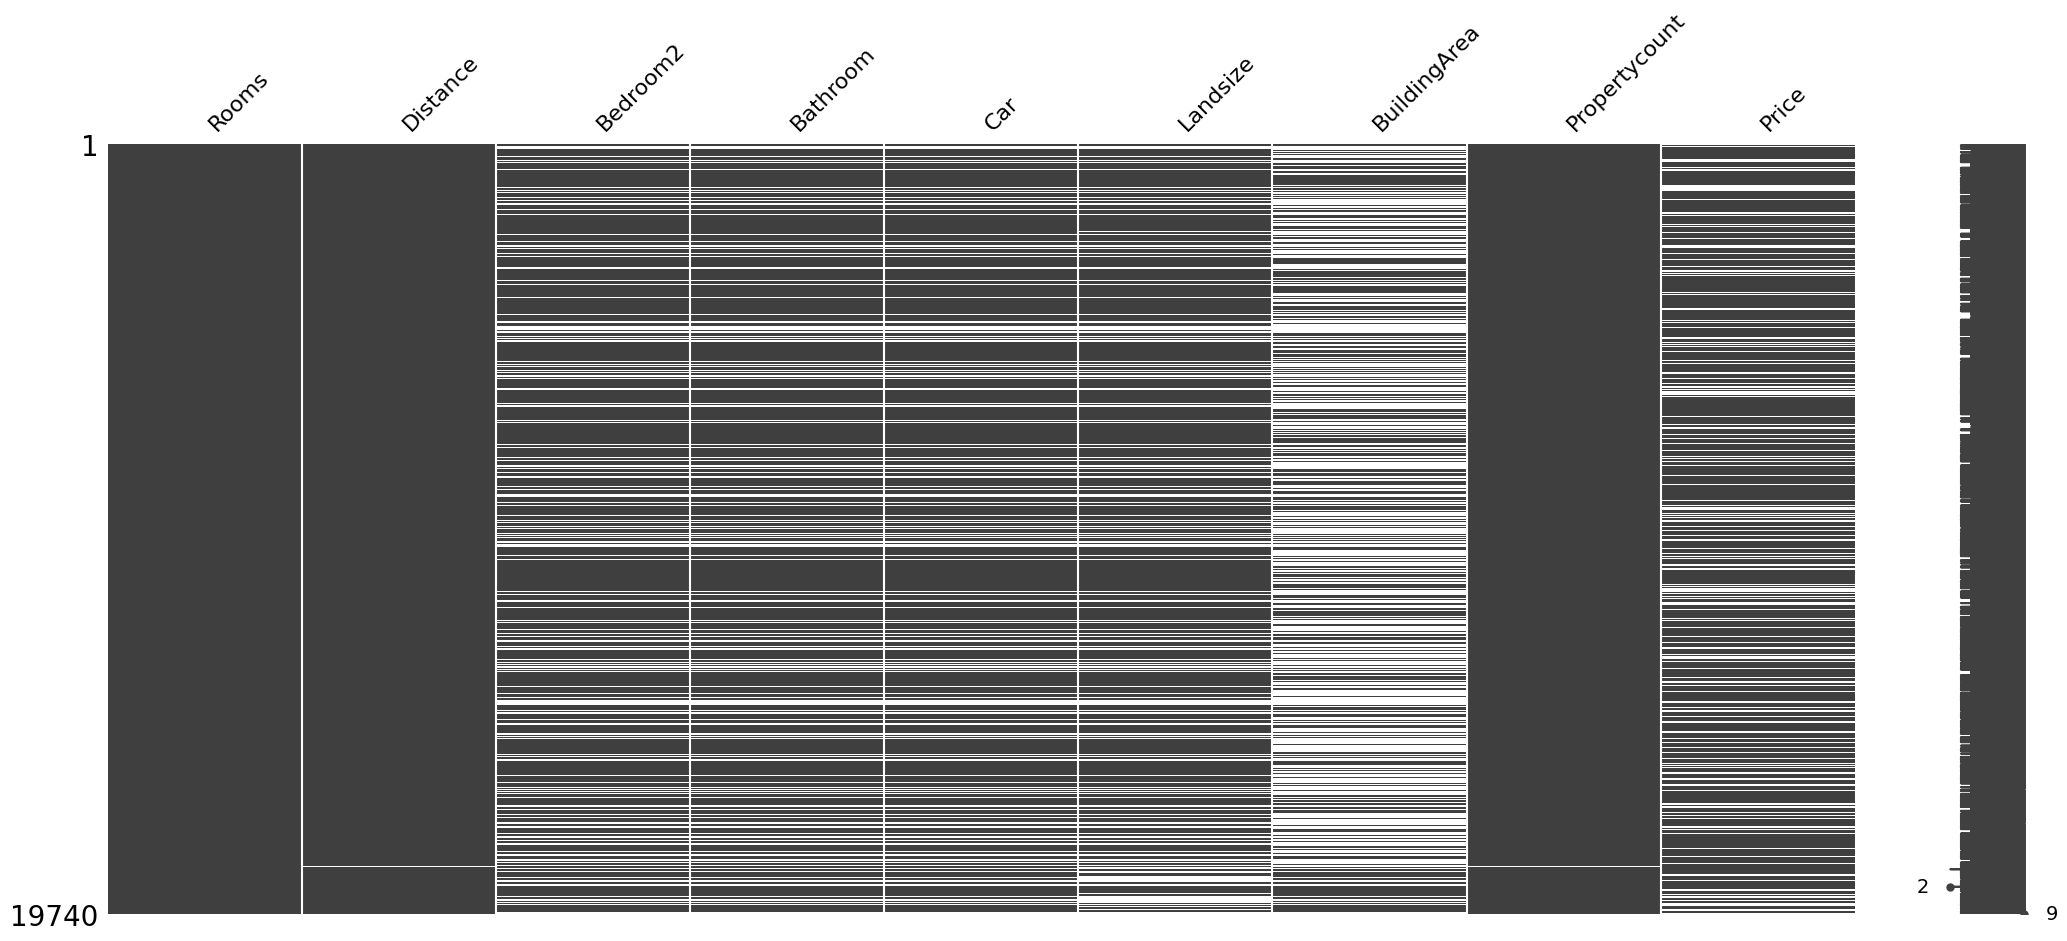

In [9]:
import missingno as msno
import matplotlib.pyplot as pyplot

#결측값 확인
msno.matrix(df2)

<Axes: >

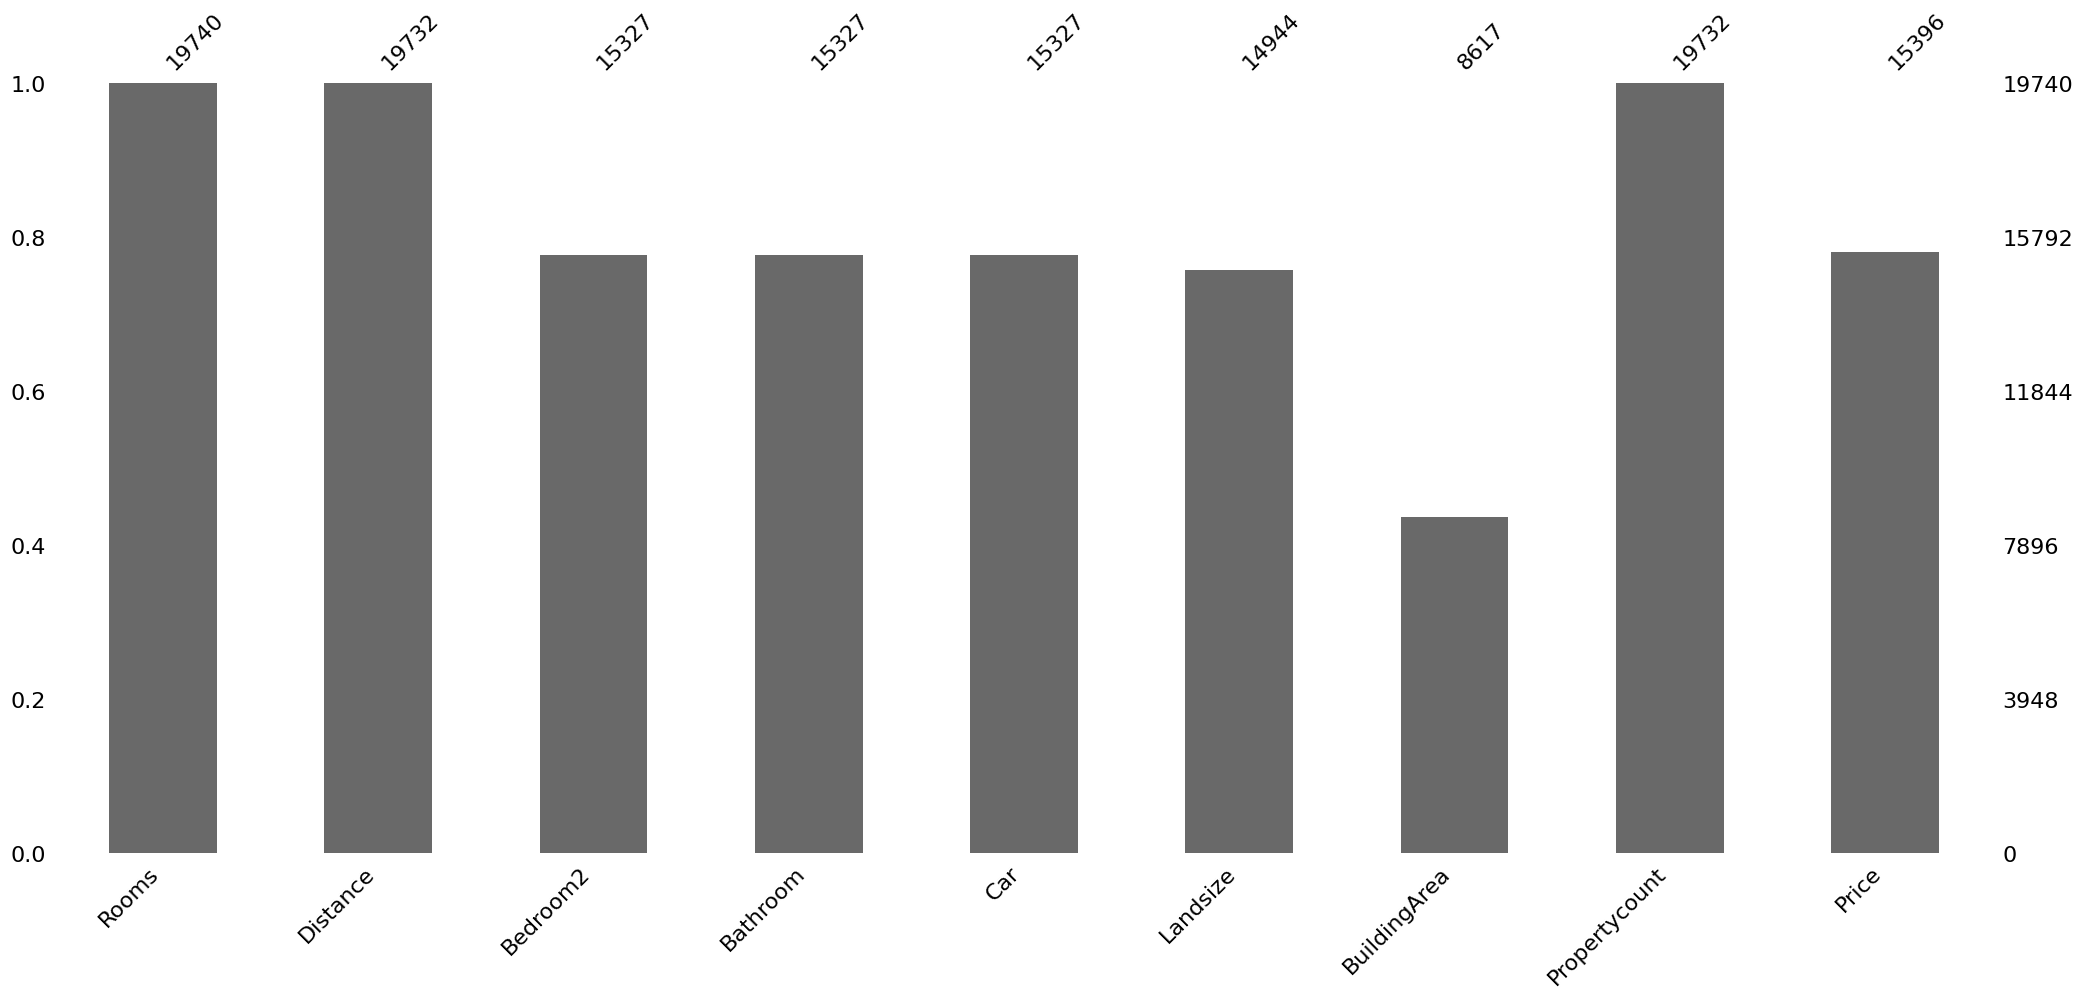

In [10]:
msno.bar(df2)
#필드별 데이터 완성도

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
#                       전략 = mean 평균 / 중위수, 최빈수
df3 = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)
df3

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Price
0,2.0,2.5,2.0,1.0,1.0,126.00000,196.806973,4019.0,1.054957e+06
1,2.0,2.5,2.0,1.0,1.0,202.00000,196.806973,4019.0,1.480000e+06
2,2.0,2.5,2.0,1.0,0.0,156.00000,79.000000,4019.0,1.035000e+06
3,3.0,2.5,3.0,2.0,1.0,0.00000,196.806973,4019.0,1.054957e+06
4,3.0,2.5,3.0,2.0,0.0,134.00000,150.000000,4019.0,1.465000e+06
...,...,...,...,...,...,...,...,...,...
19735,2.0,4.6,3.0,1.0,1.0,583.91709,585.000000,4380.0,5.600000e+05
19736,3.0,25.5,3.0,2.0,2.0,583.91709,333.000000,2940.0,5.253000e+05
19737,2.0,6.3,3.0,2.0,2.0,1999.00000,199.000000,6543.0,7.500000e+05
19738,6.0,6.3,3.0,2.0,1.0,2011.00000,238.000000,6543.0,2.450000e+06


<Axes: >

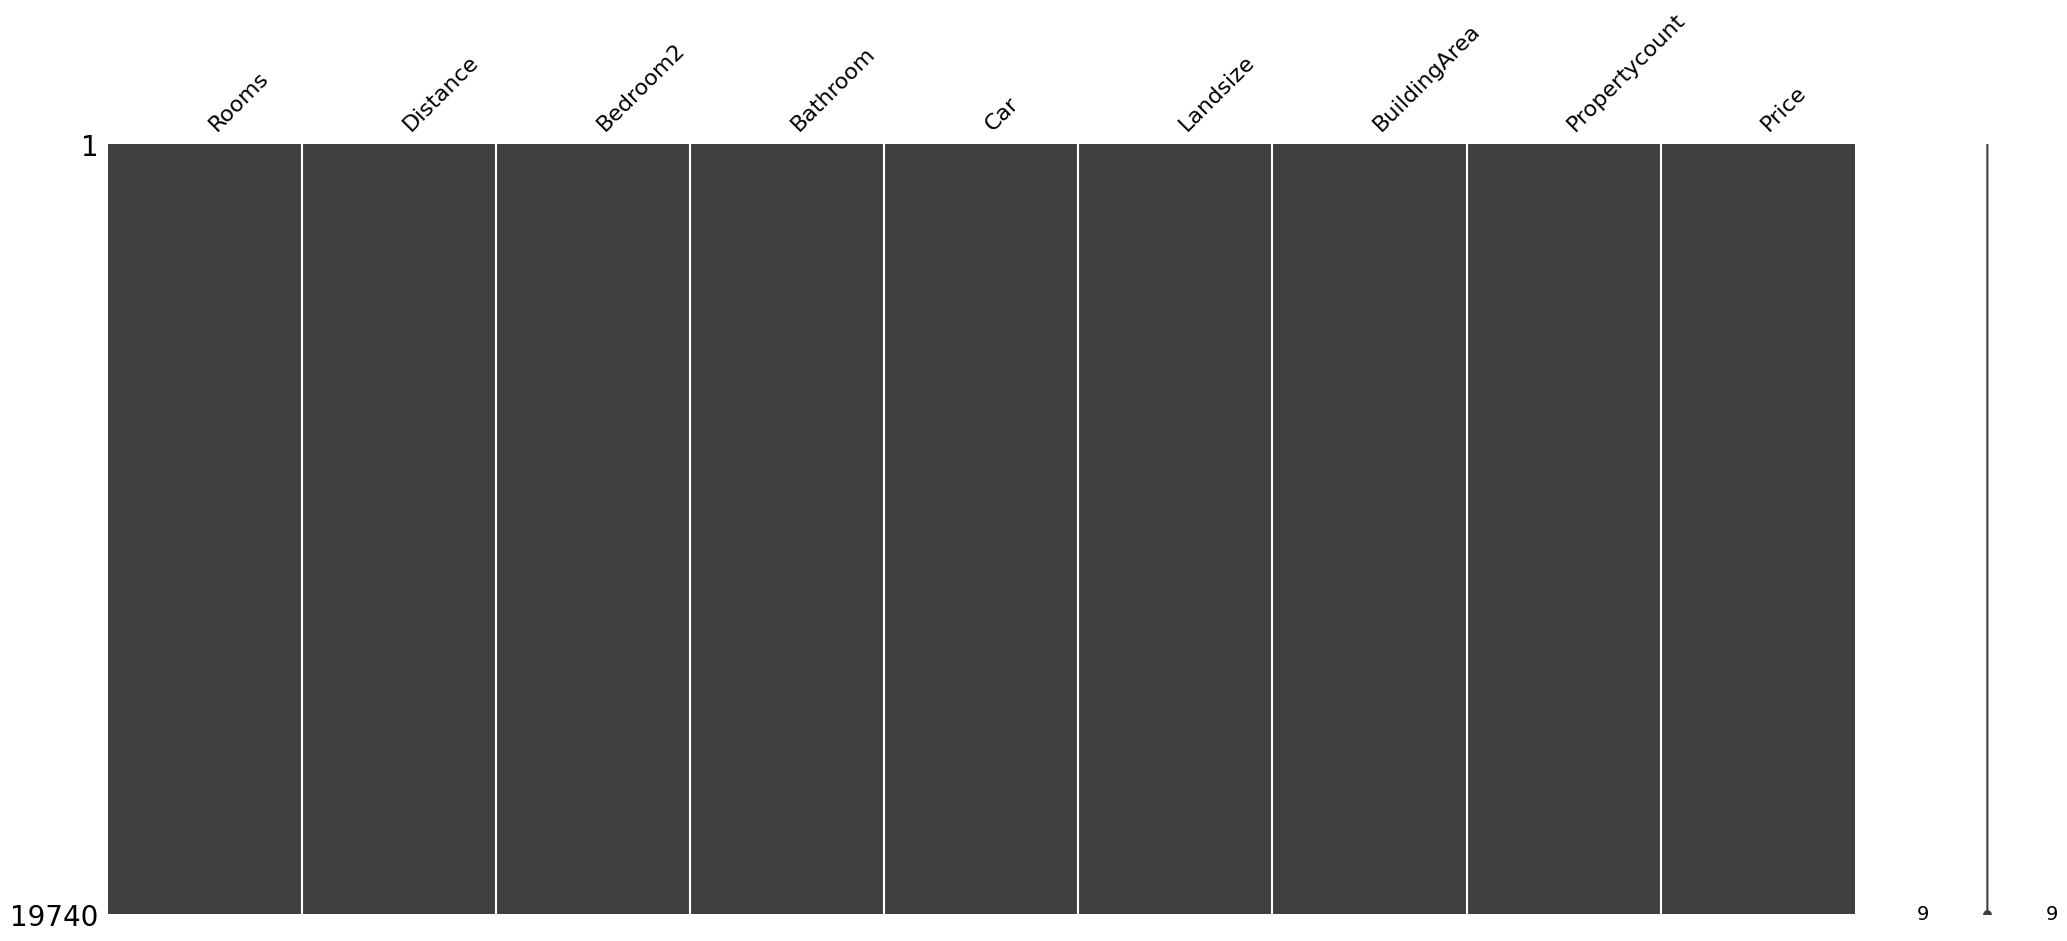

In [12]:
msno.matrix(df3)

In [13]:
cols=df3.columns[:-1]
X=df3[cols]
y=df3['Price']

In [15]:
#다중 회귀분석
import statsmodels.api as sm

model=sm.OLS(y,X)
result=model.fit()

print('회귀계수\n',result.params)
print('R-squared\n', result.rsquared)
print('P values\n', result.pvalues)

#요약 결과 출력
result.summary()

회귀계수
 Rooms            294371.005153
Distance         -23496.988924
Bedroom2           9619.034190
Bathroom         153450.013874
Car               45814.483818
Landsize              0.670134
BuildingArea         19.118400
Propertycount         7.495786
dtype: float64
R-squared
 0.8320357616277433
P values
 Rooms             0.000000e+00
Distance         3.070252e-284
Bedroom2          1.150098e-01
Bathroom         1.468789e-106
Car               2.508850e-24
Landsize          5.287350e-01
BuildingArea      4.347287e-02
Propertycount     8.631029e-27
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.832
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                          1.222e+04
Date:                Wed, 03 Jan 2024   Prob (F-statistic):                        0.00
Time:                        09:28:03   Log-Likelihood:                     -2.8670e+05
No. Observations:               19740   AIC:                                  5.734e+05
Df Residuals:                   19732   BIC:                                  5.735e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Rooms          2.944e+05   5116.944     57.529      0.000    2.84e+05    3.04e+05
Distance       -2.35e+04    641.486    -36.629      0.000   -2.48e+04   -2.22e+04
Bedroom2       9619.0342   6102.909      1.576      0.115   -2343.181    2.16e+04
Bathroom       1.535e+05   6955.878     22.060      0.000     1.4e+05    1.67e+05
Car            4.581e+04   4495.752     10.191      0.000     3.7e+04    5.46e+04
Landsize          0.6701      1.064      0.630      0.529      -1.415       2.755
BuildingArea     19.1184      9.468      2.019      0.043       0.560      37.676
Propertycount     7.4958      0.699     10.731      0.000       6.127       8.865
==============================================================================
Omnibus:                    10727.056   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           199988.120
Skew:                           2.207   Prob(JB):                         0.00
Kurtosis:                      17.955   Cond. No.                     2.02e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#가장 유의하지 않은 Landsize(유의확률 0.5287350) 제외
X=df3.loc[:,['Rooms','Car','Distance', 'Bedroom2','Bathroom','BuildingArea', 'Propertycount']]
y=df3['Price']

In [21]:
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.832
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                          1.396e+04
Date:                Wed, 03 Jan 2024   Prob (F-statistic):                        0.00
Time:                        09:43:58   Log-Likelihood:                     -2.8670e+05
No. Observations:               19740   AIC:                                  5.734e+05
Df Residuals:                   19733   BIC:                                  5.735e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Rooms          2.944e+05   5116.709     57.536      0.000    2.84e+05    3.04e+05
Car            4.584e+04   4495.500     10.197      0.000     3.7e+04    5.47e+04
Distance      -2.348e+04    641.059    -36.631      0.000   -2.47e+04   -2.22e+04
Bedroom2       9587.3833   6102.609      1.571      0.116   -2374.244    2.15e+04
Bathroom       1.535e+05   6954.033     22.080      0.000     1.4e+05    1.67e+05
BuildingArea     19.1908      9.467      2.027      0.043       0.634      37.747
Propertycount     7.5037      0.698     10.744      0.000       6.135       8.873
==============================================================================
Omnibus:                    10728.128   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200056.957
Skew:                           2.207   Prob(JB):                         0.00
Kurtosis:                      17.958   Cond. No.                     2.02e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Bedroom2 제외(유의확률 0.1150098)
X=df3.loc[:,['Rooms','Car','Distance','Bathroom','BuildingArea', 'Propertycount']]
y=df3['Price']

In [24]:
model=sm.OLS(y,X)
result=model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.832
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                          1.629e+04
Date:                Wed, 03 Jan 2024   Prob (F-statistic):                        0.00
Time:                        09:46:01   Log-Likelihood:                     -2.8670e+05
No. Observations:               19740   AIC:                                  5.734e+05
Df Residuals:                   19734   BIC:                                  5.735e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [25]:
#p.52 (7) 범주형 독립변수
#1920~1939년 노팅엄 지역 월 평균 기온 데이터

import pandas as pd
df=pd.read_csv('c:/data/degree/data.csv')
df


,year,month,value
0,1920,1,40.6
1,1920,2,40.8
2,1920,3,44.4
3,1920,4,46.7
4,1920,5,54.1
...,...,...,...
235,1939,8,61.8
236,1939,9,58.2
237,1939,10,46.7
238,1939,11,46.6


<Axes: title={'center': 'value'}, xlabel='month'>

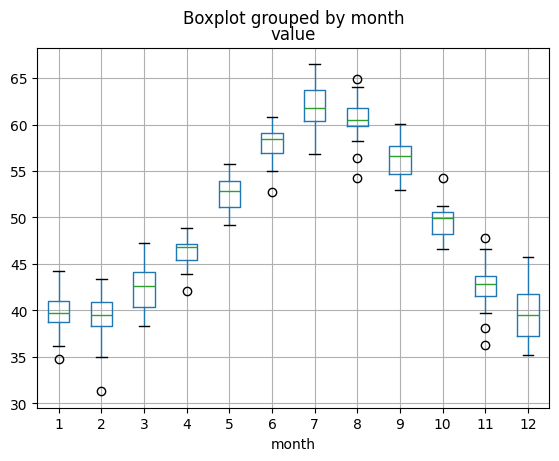

In [26]:
#boxplot(y,x)
df.boxplot('value', 'month')

In [27]:
import statsmodels.api as sm
# +0을 붙이면 1월~12월이 평균기온으로 처리됨
# coef는 월의 평균기온

#카테고리형 변수인 월이 연속숫자형으로 인식되지 않도록 C() 함수 사용
model=sm.OLS.from_formula('value ~C(month)+0',df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Wed, 03 Jan 2024   Prob (F-statistic):          2.96e-125
Time:                        10:07:29   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]     39.6950      0.518     76.691      0.000      38.675      40.715
C(month)[2]     39.1900      0.518     75.716      0.000      38.170      40.210
C(month)[3]     42.1950      0.518     81.521      0.000      41.175      43.215
C(month)[4]     46.2900      0.518     89.433      0.000      45.270      47.310
C(month)[5]     52.5600      0.518    101.547      0.000      51.540      53.580
C(month)[6]     58.0400      0.518    112.134      0.000      57.020      59.060
C(month)[7]     61.9000      0.518    119.592      0.000      60.880      62.920
C(month)[8]     60.5200      0.518    116.926      0.000      59.500      61.540
C(month)[9]     56.4800      0.518    109.120      0.000      55.460      57.500
C(month)[10]    49.4950      0.518     95.625      0.000      48.475      50.515
C(month)[11]    42.5800      0.518     82.265      0.000      41.560      43.600
C(month)[12]    39.5300      0.518     76.373      0.000      38.510      40.550
==============================================================================
Omnibus:                        5.430   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.299
Skew:                          -0.281   Prob(JB):                       0.0707
Kurtosis:                       3.463   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# +0이 없으면 첫번째 변수인 1월은 제외하고 1월을 기준으로 각 월의 평균 기온이 
# 1월보다 얼마나 더 높은지 낮은지를 나타내는 값이 회귀모형의 계수가 된다.

model=sm.OLS.from_formula('value~C(month)',df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Wed, 03 Jan 2024   Prob (F-statistic):          2.96e-125
Time:                        10:08:32   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6950      0.518     76.691      0.000      38.675      40.715
C(month)[T.2]     -0.5050      0.732     -0.690      0.491      -1.947       0.937
C(month)[T.3]      2.5000      0.732      3.415      0.001       1.058       3.942
C(month)[T.4]      6.5950      0.732      9.010      0.000       5.153       8.037
C(month)[T.5]     12.8650      0.732     17.575      0.000      11.423      14.307
C(month)[T.6]     18.3450      0.732     25.062      0.000      16.903      19.787
C(month)[T.7]     22.2050      0.732     30.335      0.000      20.763      23.647
C(month)[T.8]     20.8250      0.732     28.450      0.000      19.383      22.267
C(month)[T.9]     16.7850      0.732     22.931      0.000      15.343      18.227
C(month)[T.10]     9.8000      0.732     13.388      0.000       8.358      11.242
C(month)[T.11]     2.8850      0.732      3.941      0.000       1.443       4.327
C(month)[T.12]    -0.1650      0.732     -0.225      0.822      -1.607       1.277
==============================================================================
Omnibus:                        5.430   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.299
Skew:                          -0.281   Prob(JB):                       0.0707
Kurtosis:                       3.463   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# p.56 (9) 보험료 예측
# https://www.kaggle.com/mirichoi0218/insurance/downloads/insurance.csv/1

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('c:/data/insurance/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
data.corr()['charges'].sort_values()
#corr() → 상관계수를 구하는 함수. 필드에 텍스트를 포함하고 있어 에러발생

ValueError: could not convert string to float: 'female'

In [32]:
data2=pd.read_csv('c:/data/insurance/insurance2.csv')
data2.head()

,age,sex,bmi,children,smoker,southwest,southeast,northeast,northwest,charges
0,19,0,27.900,0,1,1,0,0,0,16884.92400
1,18,1,33.770,1,0,0,1,0,0,1725.55230
2,28,1,33.000,3,0,0,1,0,0,4449.46200
3,33,1,22.705,0,0,0,0,0,1,21984.47061
4,32,1,28.880,0,0,0,0,0,1,3866.85520


In [33]:
data2.corr()['charges'].sort_values

<bound method Series.sort_values of age          0.299008
sex          0.057292
bmi          0.198341
children     0.067998
smoker       0.787251
southwest   -0.043210
southeast    0.073982
northeast    0.006349
northwest   -0.039905
charges      1.000000
Name: charges, dtype: float64>

In [34]:
X=data2[data2.columns[:-1]]
y=data2['charges']

import statsmodels.api as sm
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:29:03   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          256.8564     11.899     21.587      0.000     233.514     280.199
sex         -131.3144    332.945     -0.394      0.693    -784.470     521.842
bmi          339.1935     28.599     11.860      0.000     283.088     395.298
children     475.5005    137.804      3.451      0.001     205.163     745.838
smoker      2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
southwest   -1.29e+04   1020.964    -12.634      0.000   -1.49e+04   -1.09e+04
southeast  -1.297e+04   1079.158    -12.022      0.000   -1.51e+04   -1.09e+04
northeast  -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
northwest  -1.229e+04    988.196    -12.438      0.000   -1.42e+04   -1.04e+04
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         605.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X.columns
X=X[['age','bmi','children','smoker','southwest','southeast','northeast','northwest']]
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:30:43   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          256.9736     11.891     21.610      0.000     233.646     280.301
bmi          338.6646     28.559     11.858      0.000     282.639     394.690
children     474.5665    137.740      3.445      0.001     204.355     744.778
smoker      2.384e+04    411.856     57.875      0.000     2.3e+04    2.46e+04
southwest  -1.295e+04   1012.403    -12.791      0.000   -1.49e+04    -1.1e+04
southeast  -1.302e+04   1071.021    -12.161      0.000   -1.51e+04   -1.09e+04
northeast  -1.199e+04    978.762    -12.250      0.000   -1.39e+04   -1.01e+04
northwest  -1.234e+04    979.405    -12.602      0.000   -1.43e+04   -1.04e+04
==============================================================================
Omnibus:                      300.735   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.516
Skew:                           1.212   Prob(JB):                    3.48e-157
Kurtosis:                       5.654   Cond. No.                         600.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""